In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *
%matplotlib inline
import numpy as np
from sklearn import datasets, linear_model
from sklearn import cross_validation


In [4]:
#read serie A data
df_coll = []
'''
#serie A 
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/I1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1415/I1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1314/I1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1213/I1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1112/I1.csv"))
#df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1011/I1.csv"))
#df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/0910/I1.csv"))
#df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/0809/I1.csv"))
'''

#Bundes 
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/D1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1415/D1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1314/D1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1213/D1.csv"))
df_coll.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1112/D1.csv"))



'''
#read EPL data
#df_cal   = pd.read_csv("../data/EPL-1516.csv")
df_cal_2 = pd.read_csv("../data/EPL-1415.csv")
df_cal_3 = pd.read_csv("../data/EPL-1314.csv")
df_cal_4 = pd.read_csv("../data/EPL-1213.csv")
df_cal_5 = pd.read_csv("../data/EPL-1112.csv")

#read La Liga data
df_cal   = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/SP1.csv")
df_cal_2 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1415/SP1.csv")
df_cal_3 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1314/SP1.csv")
df_cal_4 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1213/SP1.csv")
df_cal_5 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1112/SP1.csv")
'''


df_coll[-1].head(10)
df_coll[-1].keys()

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'HS', u'AS', u'HST', u'AST', u'HF', u'AF',
       u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H', u'B365D', u'B365A',
       u'BWH', u'BWD', u'BWA', u'GBH', u'GBD', u'GBA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'SBH', u'SBD', u'SBA', u'WHH', u'WHD', u'WHA',
       u'SJH', u'SJD', u'SJA', u'VCH', u'VCD', u'VCA', u'BSH', u'BSD', u'BSA',
       u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD', u'BbAvD', u'BbMxA', u'BbAvA',
       u'BbOU', u'BbMx>2.5', u'BbAv>2.5', u'BbMx<2.5', u'BbAv<2.5', u'BbAH',
       u'BbAHh', u'BbMxAHH', u'BbAvAHH', u'BbMxAHA', u'BbAvAHA',
       u'Unnamed: 70', u'Unnamed: 71', u'Unnamed: 72'],
      dtype='object')

In [10]:
def get_teams(df):
    
    teams = []
    
    for i,cal in enumerate(df.iterrows()):
        teams.append(cal[1]["HomeTeam"])
        teams.append(cal[1]["AwayTeam"])

        if i == 9: 
            return teams


In [13]:
teams_a  = get_teams(df_coll[0])
teams_coll = [get_teams(df) for df in df_coll]

print teams_coll[4]


['Dortmund', 'Hamburg', 'Augsburg', 'Freiburg', 'FC Koln', 'Wolfsburg', 'Hannover', 'Hoffenheim', 'Hertha', 'Nurnberg', 'Stuttgart', 'Schalke 04', 'Werder Bremen', 'Kaiserslautern', 'Bayern Munich', "M'gladbach", 'Mainz', 'Leverkusen', 'Freiburg', 'Mainz']


**Definition of features**

In [14]:
def build_features(df, teams):

    team_features = []
    
    for team in teams:
        #print team_a
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]
        
        #shots made
        team_s    = team_away["AS"].sum()  + team_home["HS"].sum()
        #shots on-target made
        team_st   = team_away["AST"].sum() + team_home["HST"].sum()
        #shots conceded
        team_sc    = team_away["HS"].sum()  + team_home["AS"].sum()
        #shots on-target conceded
        team_stc   = team_away["HST"].sum() + team_home["AST"].sum()
        #corners awarded
        team_c    = team_away["AC"].sum()  + team_home["HC"].sum()
        #corners conceded
        team_cc    = team_away["HC"].sum()  + team_home["AC"].sum()
        #woodwork hit
        #team_w    = team_away["AHW"].sum()  + team_home["HHW"].sum()
        #woodwork conceded
        #team_wc = team_away["HHW"].sum()  + team_home["AHW"].sum()

        team_features.append([team_s,team_sc,team_st,team_stc,team_c,team_cc])

    return team_features
    

In [15]:
def build_target(df, teams):

    team_target = []
    
    for team in teams:
        #print team_a
        t      = df[(df['HomeTeam']==team) | (df['AwayTeam']==team)]
        team_home = df[df['HomeTeam']==team]
        team_away = df[df['AwayTeam']==team]

        team_h_win = len(team_home[team_home['FTHG']>team_home['FTAG']])
        team_a_win = len(team_away[team_away['FTAG']>team_away['FTHG']])
        team_draw = len(t[t['FTAG']==t['FTHG']])

        team_points = 3*team_a_win + 3*team_h_win + team_draw
        team_target.append(team_points)

    return team_target


In [16]:
feat_test = build_features(df_coll[0],teams_a)
targ_test = build_target(df_coll[0],teams_a)

print len(feat_test)
print len(targ_test)

print feat_test
print targ_test

20
20
[[607, 251, 257, 83, 228, 86], [373, 466, 136, 175, 130, 182], [444, 540, 150, 186, 128, 190], [331, 421, 128, 145, 143, 153], [346, 509, 116, 159, 117, 204], [380, 507, 126, 211, 151, 207], [529, 269, 212, 110, 191, 110], [454, 455, 191, 158, 146, 137], [485, 362, 185, 143, 217, 140], [379, 533, 134, 202, 137, 207], [383, 467, 150, 165, 145, 175], [422, 366, 128, 125, 143, 138], [453, 439, 151, 173, 148, 183], [487, 491, 163, 166, 170, 179], [498, 465, 188, 208, 224, 142], [416, 487, 164, 167, 162, 190], [489, 386, 194, 152, 168, 144], [368, 430, 136, 181, 161, 142], [331, 421, 128, 145, 143, 153], [453, 439, 151, 173, 148, 183]]
[88, 41, 38, 50, 38, 25, 78, 55, 60, 37, 50, 40, 38, 52, 33, 43, 45, 36, 50, 38]


In [19]:
features = []

for seas,teams in zip(df_coll,teams_coll): 
    features += build_features(seas,teams) 

print len(features)

target = []

for seas,teams in zip(df_coll,teams_coll): 
    target += build_target(seas,teams)

print len(target)

df = pd.DataFrame(features, columns=["shots","shots_ontarget","shots_conceded","shots_conceded_ontarget","corners","corners_conceded"])

df["points"] = target

df.to_csv("../data/proc_data_de.csv")

#print features
#print target

100
100


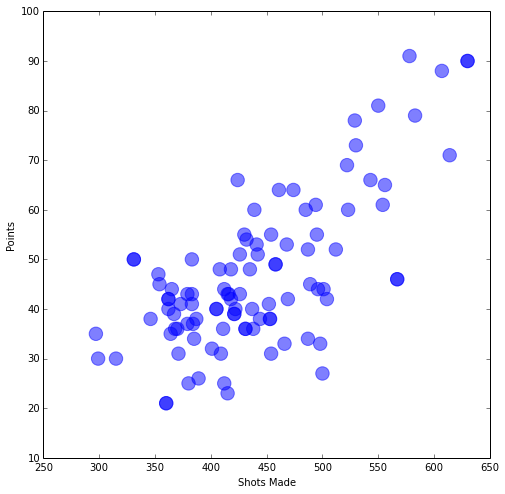

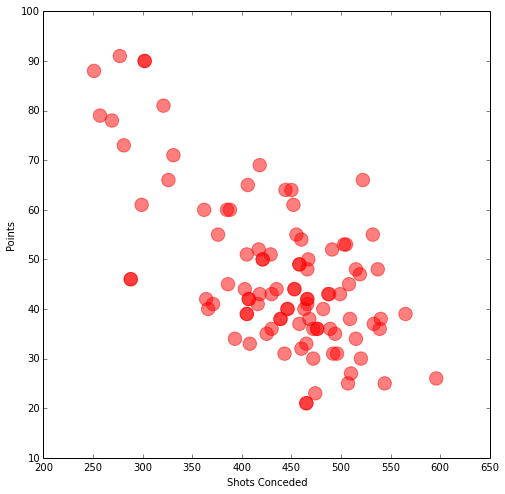

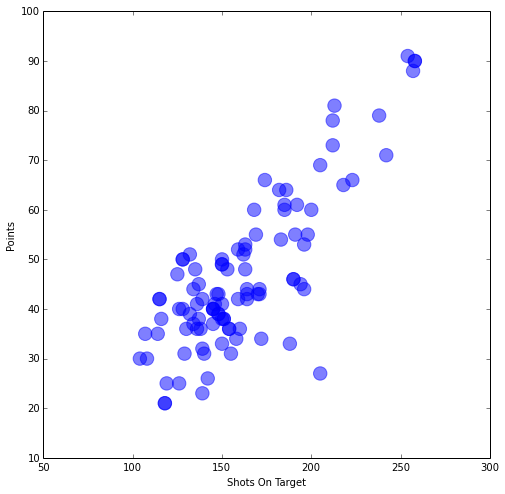

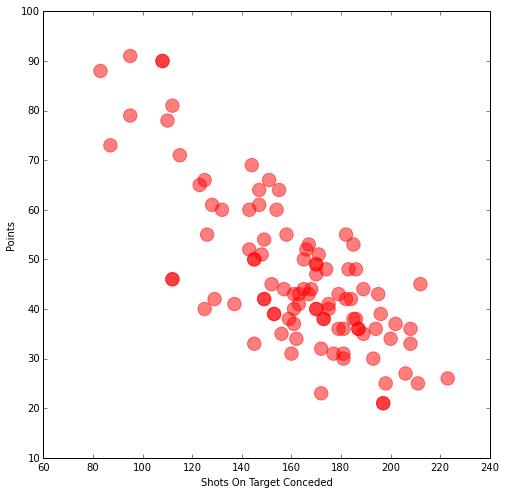

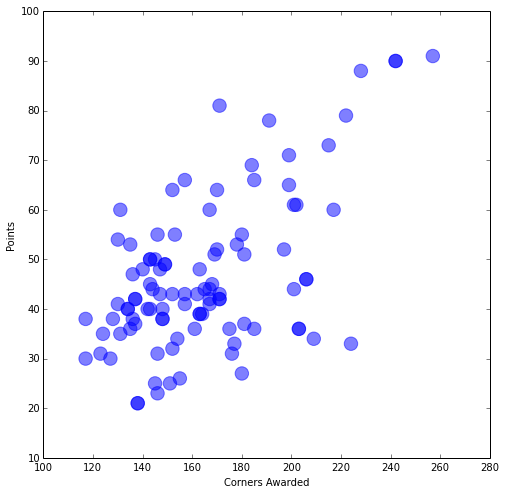

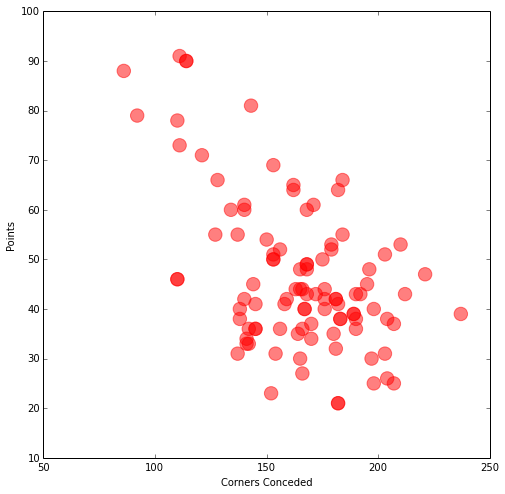

In [18]:
# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,0], target,  color='b',s=180,alpha=0.5)

xlabel('Shots Made')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,1], target,  color='r',s=180,alpha=0.5)

xlabel('Shots Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,2], target,  color='b',s=180,alpha=0.5)

xlabel('Shots On Target')
ylabel('Points')

plt.show()

# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,3], target,  color='r',s=180,alpha=0.5)

xlabel('Shots On Target Conceded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,4], target,  color='b',s=180,alpha=0.5)

xlabel('Corners Awarded')
ylabel('Points')


# Plot outputs
figure(1)
figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.array(features)[:,5], target,  color='r',s=180,alpha=0.5)

xlabel('Corners Conceded')
ylabel('Points')


In [20]:
df = pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/D1.csv")


In [21]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,D1,14/08/15,Bayern Munich,Hamburg,5,0,H,1,0,H,...,3.10,30,-2.50,1.91,1.84,2.06,1.99,1.10,12.57,30.92
1,D1,15/08/15,Augsburg,Hertha,0,1,A,0,0,D,...,1.63,27,-0.50,2.04,1.99,1.91,1.86,2.13,3.43,3.87
2,D1,15/08/15,Darmstadt,Hannover,2,2,D,1,0,H,...,1.70,27,0.00,1.88,1.80,2.14,2.05,2.70,3.28,2.90
3,D1,15/08/15,Dortmund,M'gladbach,4,0,H,3,0,H,...,1.96,25,-0.50,1.75,1.71,2.27,2.19,1.63,4.24,5.85
4,D1,15/08/15,Leverkusen,Hoffenheim,2,1,H,1,1,D,...,2.38,27,-1.00,1.88,1.82,2.09,2.03,1.48,4.84,7.28
5,D1,15/08/15,Mainz,Ingolstadt,0,1,A,0,0,D,...,1.81,27,-0.50,2.05,1.99,1.92,1.86,1.97,3.63,4.20
6,D1,15/08/15,Werder Bremen,Schalke 04,0,3,A,0,1,A,...,2.09,26,0.25,1.90,1.86,2.06,2.00,3.22,3.74,2.26
7,D1,16/08/15,Stuttgart,FC Koln,1,3,A,0,0,D,...,1.76,27,-0.50,2.09,2.03,1.88,1.83,2.07,3.67,3.77
8,D1,16/08/15,Wolfsburg,Ein Frankfurt,2,1,H,2,1,H,...,2.63,26,-1.25,2.06,1.98,1.93,1.88,1.44,5.27,7.29
9,D1,21/08/15,Hertha,Werder Bremen,1,1,D,1,1,D,...,1.77,25,-0.50,2.14,2.06,1.85,1.80,2.10,3.54,3.82
